In [38]:

import numpy as np

import math

import matplotlib.pyplot as plt
from scipy import stats

from scipy.stats import norm


tyear=3.15551e+07


au=1.5e11
msun=2e30
mearth=5.97e24
grav=6.67e-11

from astropy.io import ascii

import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)
sns.set_style('ticks')
sns.set_context("talk", rc={"lines.linewidth": 2})



import re
dir1=['/Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/delta_0.05/mtot_100_dmax_30km_fv_0.04/']



vol=1

label=dir1
dirlist=dir1


color_all=['tab:blue','tab:olive', 'tab:orange', 'tab:red', 'tab:purple', 'tab:green', 'k']

color_all = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']


#230300

#########


#### do this for each file 



for j in range(0,np.size(dir1)):
    f = open(dir1[j]+ "inparam.in", "r")


    print(dirlist[j])
    
    
    

    f = open(dirlist[j]+ "inparam.in", "r")
    print(f.readline()) #restart
    print(f.readline()) #calchi
    print(f.readline()) #solid
    print(f.readline()) #track origin

    

    line_split=f.readline() 

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    delta_t=float(delta_t_all[1])

    line_split=f.readline() #rin
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    rin=float(delta_t_all[1])

   
    line_split=f.readline() #rout

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    rout=float(delta_t_all[1])

    
    
    line_split=f.readline() #imax

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    imax=float(delta_t_all[1])
    print(imax, 'imax')

    line_split=f.readline() #ecc

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    ecc=float(delta_t_all[1])
    line_split=f.readline() #vrel

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    vrel=float(delta_t_all[1])

    
     # delta

    line_split=f.readline()  # 
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    delta=float(delta_t_all[1])
    print(delta, 'delta')

    line_split=f.readline()  # alpha
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    alphap=float(delta_t_all[1])


    q=(2+alphap)/3

    print("Q", q)
        
    line_split=f.readline() # mtot0
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    mtot0=float(delta_t_all[1])

   

    line_split=f.readline()  # rho_s
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    rho_s=float(delta_t_all[1])

    line_split=f.readline()  # rho_v
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    rho_v=float(delta_t_all[1])




    
    line_split=f.readline() # dmax
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    dmax=float(delta_t_all[1])



    line_split=f.readline() # dbl
    

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    dbl=float(delta_t_all[1])
    print('db', dbl)


    print(f.readline()) # ntime

    line_split=f.readline() 

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    outputinterval=float(delta_t_all[1])


    print(f.readline()) # agrain


    line_split=f.readline() 

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    fv0=float(delta_t_all[1])


    print(f.readline()) # 

    f.close()


    #in_dat = ascii.read('inparam.in')

    
    #; find the number of bins! 

    print(dmax, dbl, delta)
    
    diam_scrap=dmax
    i=0
    while(diam_scrap > dbl) :
           diam_scrap=(1-delta)**(1./3.)*diam_scrap 
           i=i+1 

    nbin=i-1


    print ( 'nbin', nbin)

    mass_i=np.zeros(nbin)
    diam_i=np.zeros(nbin)


    diam_i[0]=dmax
    mass_i[0]=rho_s*diam_i[0]**3./6.
    for i in range(1, nbin-1):
        mass_i[i]=mass_i[i-1]*(1-delta)
    diam_i=(mass_i*6./rho_s)**(1./3.)

    ntime=100000


   #in_dat = ascii.read('inparam.in')



# {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'};
#linestyles = ['-', '--', '-.', ':']

    r= au*(rin + rout)/2.
    
    mtot=mtot0*mearth

    dr=(rout-rin)*au
    d_c=1e3
    dr_r=dr/r
    
    mstar=1*msun


    qa=620
    qb=5.6e-3
    a=0.3
    b=1.5
    qdstar=qa*d_c**(-a) + qb*d_c**(b)

    vk=((6.67e-11*mstar)/r)**0.5
    
    tper= 2*np.pi*(r**3./(grav*msun))**0.5


    

    vk=((6.67e-11*mstar)/r)**0.5
    f_e_I=ecc

    vrel=ecc*vk
    x_c=(2*qdstar/vrel**2)**(1./3.)


    
  
    t_c=((8 *np.pi*r**(5/2) *dr *d_c*rho_s)/(3*mstar**(1/2)*mtot))*((3*q-5)/(6-3*q))*((2*imax)/(0.2*x_c**(5/2))) *(1/ f_e_I)
    
    print("TC", t_c)

#########################################################################################

##### choose times that are neat in 'years
 
###############################################################################

#
print(mtot)
print(qdstar, d_c)
print(d_c, mtot, r, q, vrel)

/Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/delta_0.05/mtot_100_dmax_30km_fv_0.04/
Restart 1	1=beginning_else_inputfiles

Calcchi 1	1=calculatechi

Solids_only	0	1=solidsonly

track_origin	0	1=track_origin

0.15 imax
0.05 delta
Q 1.8333333333333333
db 0.001
ntime	1e8

Fv(0)	0.04

chi	0.1

30000.0 0.001 0.05
nbin 1006
TC 392815580912222.6
5.97e+26
255.1409245006676 1000.0
1000.0 5.97e+26 16875000000000.0 1.8333333333333333 281.161611625506


In [39]:
def calc_qdstar(d):
    a=0.3
    Qa=620
    Qb=5.6e-3
    b=1.5
    qdstar=Qa*d**(-a) + Qb*d**(b)
    return qdstar;

In [40]:
plot_define_timestep=1

if plot_define_timestep:
    timestep_plot_yr=[ 0, 1e7, 1e8, 2e8]
   
    timestep_plot=np.zeros(np.size(timestep_plot_yr))

    yyy=int(np.log10(outputinterval)*(-1.))
    for kk in range(0,np.size(timestep_plot_yr)):
        timestep_plot[kk]=round(timestep_plot_yr[kk]*tyear/(delta_t), yyy)
    print('timestep_plot', timestep_plot)
else:
    ##### read off the maximum timestep from collouts.dat = grep T collouts.dat > timestep

    timestep_max=  244000
    nplot=2
    yyy=int(np.log10(outputinterval)*(-1.))
    timestep_plot=round(timestep_max/4.,yyy), round(timestep_max/2., yyy), round(3.*timestep_max/4., yyy), round(timestep_max, yyy)-5.*outputinterval
    timestep_plot_yr=np.zeros(np.size(timestep_plot))

    for kk in range(0,np.size(timestep_plot_yr)):
        timestep_plot_yr[kk]=timestep_plot[kk]*delta_t/tyear
    print(timestep_plot)
    print(timestep_plot_yr/1e6)
##    
    
#########
itime_max_float_arr=timestep_plot
 ##  read in collouts.dat
#########################################################################################



timestep_plot [     0.  32000. 316000. 631000.]


In [41]:
def get_mass (itime_max_float, file, vol):

         #print(itime_max_float, file, vol)
        f = open(file, "r")

        if (vol==0):
            f.readline() # first line of constants
            f.readline() # gas

            f.readline() # mdot
            f.readline() # mdot
        if (vol==1):
            f.readline()


         #print(itime_max_float, it)
        timestep=0
        while (timestep <  itime_max_float):
        # timestep line
             #print('ee',timestep,itime_max_float)
            line_split=f.readline()
            
            timestep_all=re.split(r' ', line_split.rstrip('  '))
            if (np.size(timestep_all)!=3):
                print('oops not 3 dims in timestep', timestep_all, timestep, itime_max_float)
            timestep=float(timestep_all[2])
            
            
            mass=f.readline() # line with mass
            

            mass_all=re.split(r'\t+', mass.rstrip('\t'))
            if (vol==0):
                f.readline() #  Gas 
                f.readline() # Mdot
            #print(mass)
    
        line_split=f.readline() 
    
        

        timestep_all=re.split(r' ', line_split.rstrip('  '))
        timestep=float(timestep_all[2])
        
        mass=f.readline() # line with mass
        mass_all_1=re.split(r'\t+', mass.rstrip('\t'))
        

        f.close()

        return(mass_all_1)
        


In [42]:
def get_rate (itime_max_float, file):

         #finds the rate as a function of diamter/mass at a particular epoch - given by itime_max_float
        # the file should be /rate_r.dat or /rate_c.dat 

        f = open(file, "r")

        f.readline()


         #print(itime_max_float, it)
        timestep=0
        while (timestep <  itime_max_float):
        # timestep line
              #print(timestep,itime_max_float)
            line_split=f.readline()
            
            timestep_all=re.split(r' ', line_split.rstrip('  '))
            if (np.size(timestep_all)!=3):
                print('oops not 3 dims in timestep', timestep_all, timestep, itime_max_float)
            timestep=float(timestep_all[2])
            
            
            mass=f.readline() # line with mass
            

            mass_all=re.split(r'\t+', mass.rstrip('\t'))

    
        line_split=f.readline() 
    
        

        timestep_all=re.split(r' ', line_split.rstrip('  '))
        timestep=float(timestep_all[2])
        
        mass=f.readline() # line with mass
        mass_all_1=re.split(r'\t+', mass.rstrip('\t'))
        

        f.close()

        return(mass_all_1)
        



In [43]:
def get_mass_time (itime_max_float, file, vol, index):

         #print(itime_max_float, file, vol)
        f = open(file, "r")

        if (vol==0):
            f.readline() # first line of constants
            f.readline() # gas

            f.readline() # mdot
            f.readline() # mdot
        if (vol==1):
            f.readline()


         #print(itime_max_float, it)
        mass_v=np.zeros(int(itime_max_float))
        time_v=np.zeros(int(itime_max_float))
        timestep=0
        it=0
        while (timestep <=  itime_max_float):
        # timestep line
            #print(timestep,itime_max_float)
            line_split=f.readline()
            
            timestep_all=re.split(r' ', line_split.rstrip('  '))
            if (np.size(timestep_all)!=3):
                print('oops not 3 dims in timestep', timestep_all, timestep, itime_max_float)
            timestep=float(timestep_all[2])
            time_v[it]=timestep
            
            
            mass=f.readline() # line with mass
            

            mass_all=re.split(r'\t+', mass.rstrip('\t'))
            mass_v[it]=float(mass_all[index])
            
                
            if (vol==0):
                f.readline() #  Gas 
                f.readline() # Mdot
            #print(mass)
            it=it+1
    
        line_split=f.readline() 
    
        

        timestep_all=re.split(r' ', line_split.rstrip('  '))
        timestep=float(timestep_all[2])
        
        mass=f.readline() # line with mass
        mass_all_1=re.split(r'\t+', mass.rstrip('\t'))
        

        f.close()

        return(mass_v, time_v)
        



In [44]:
def calc_qdstar(d):
    a=0.3
    Qa=620
    Qb=5.6e-3
    b=1.5
    qdstar=Qa*d**(-a) + Qb*d**(b)
    return qdstar;
def calc_mck(mk, rhok, vrel):
    d=(6.*mk/(np.pi*rhok))**(1./3.)
    mck=mk*(2.*calc_qdstar(d)/vrel**2)
    return(mck)
def calc_qsstar(d):
    a=0.3
    Qa=620
    Qb=5.6e-3
    b=1.5
    qsstar=Qa*d**(-a) 
    return qsstar;
def calc_mrk(mk, rhok, vrel):
    d=(6.*mk/(np.pi*rhok))**(1./3.)
    mrk=mk*(2.*calc_qsstar(d)/vrel**2)
    return(mrk)



In [45]:
def get_inparam(file):    
    f = open(file, "r")
    f.readline() #restart
    f.readline() #calchi
    f.readline() #solid
    f.readline() #track origin
   

    line_split=f.readline() 

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    delta_t=float(delta_t_all[1])

    line_split=f.readline() #rin
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    rin=float(delta_t_all[1])

   
    line_split=f.readline() #rout

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    rout=float(delta_t_all[1])

    rbelt=(rin+ rout)/2.
    
    line_split=f.readline() #imax

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    imax=float(delta_t_all[1])
   

    line_split=f.readline() #ecc

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    ecc=float(delta_t_all[1])
    line_split=f.readline() #vrel

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    vrel=float(delta_t_all[1])

    
     # delta

    line_split=f.readline()  # 
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    delta=float(delta_t_all[1])
  

    line_split=f.readline()  # alpha
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    alpha_p=float(delta_t_all[1])


    alpha=(2+alpha_p)/3

        
    line_split=f.readline() # mtot0
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    mtot0=float(delta_t_all[1])

    line_split=f.readline()  # rho_s
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    rho_s=float(delta_t_all[1])

    line_split=f.readline()  # rho_v
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    rho_v=float(delta_t_all[1])

   
    line_split=f.readline() # dmax
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    dmax=float(delta_t_all[1])



    line_split=f.readline() # dbl
    

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    dbl=float(delta_t_all[1])

    f.readline() # ntime

    line_split=f.readline() 

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    outputinterval=float(delta_t_all[1])


    f.readline() # agrain


    line_split=f.readline() 

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    fv0=float(delta_t_all[1])


    f.readline() # 
    

    f.close()
    
    diam_scrap=dmax
    i=0
    while(diam_scrap > dbl) :
           diam_scrap=(1-delta)**(1./3.)*diam_scrap 
           i=i+1 

    nbin=i-1


    mass_i=np.zeros(nbin)
    diam_i=np.zeros(nbin)


    diam_i[0]=dmax
    mass_i[0]=rho_s*diam_i[0]**3./6.
    for i in range(1, nbin-1):
        mass_i[i]=mass_i[i-1]*(1-delta)
    diam_i=(mass_i*6./rho_s)**(1./3.)
    return(delta_t, outputinterval, dmax, dbl, delta, diam_i, nbin, vrel, rho_s, mtot0, rbelt, alpha, ecc,fv0)

entering new loop it 0
about to read colloutv.dat /Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/delta_0.05/mtot_100_dmax_30km_fv_0.04/
finished
0.0
entering new loop it 1
about to read colloutv.dat /Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/delta_0.05/mtot_100_dmax_30km_fv_0.04/
finished
10000000.0
entering new loop it 2
about to read colloutv.dat /Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/delta_0.05/mtot_100_dmax_30km_fv_0.04/
finished
100000000.0
entering new loop it 3
about to read colloutv.dat /Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/delta_0.05/mtot_100_dmax_30km_fv_0.04/
finished
200000000.0


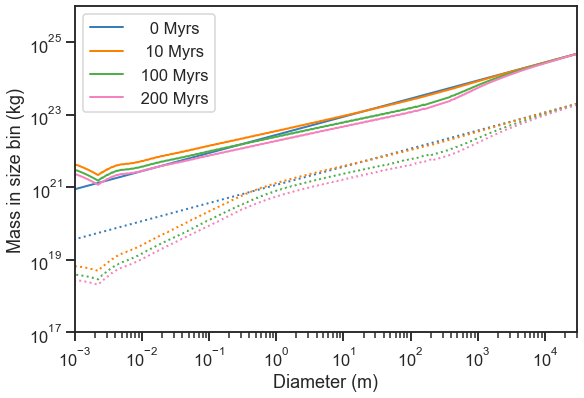

In [46]:
ll=0 
fig, ax = plt.subplots(figsize=(9, 6))
for it in range(0,np.size(itime_max_float_arr)):
    print('entering new loop it', it)
    itime_max_float= itime_max_float_arr[it]
    ####print('itime', itime_max_float)
    mass_all_1=get_mass(itime_max_float, dir1[j]+ "collouts.dat", 0)

    
    
################################################################################################
    time=float(timestep_plot_yr[ll])
    
    mass_s=np.zeros(nbin)
    for i in range(0,nbin-1): 
        mass_s[i]=float(mass_all_1[i])

        
        
    ####print, ll
    plt.plot(diam_i, mass_s,  color=color_all[it],label='{:4.0f}'.format(timestep_plot_yr[ll]/1e6) +' Myrs' )  ###,label=str(round(time/(1e6*tyear),4))+'Myr')
    print('about to read colloutv.dat', dir1[j]) 
    if vol==1:
        mass_all_v=get_mass(itime_max_float, dir1[j]+ "colloutv.dat", 1) 
        print('finished')
        mass_s=np.zeros(nbin)

        for i in range(0,nbin-1): 
            mass_s[i]=float(mass_all_v[i])
        #######if (i==500):
            #######print('GG',diam_i[100], mass_s[100])

    ####print, ll
    plt.plot(diam_i, mass_s,  color=color_all[it],  linestyle=':')  ###,label=str(round(time/(1e6*tyear),4))+'Myr')
    
################################################################################################
####now over plot D eq
    print(time)
    file=dir1[j]+ "inparam.in"
    delta_t, outputinterval, dmax, dbl, delta, diam_i, nbin, vrel, rho_s, mtot0, rbelt, alpha, ecc,fv0=get_inparam(file)

    ll=ll+1
    ####
ax.legend() 
ax.set_yscale('log') 
ax.set_xscale('log') 
plt.xlabel('Diameter (m)') 
plt.ylabel('Mass in size bin (kg)') 
ax.set_ylim((1e17,1e26)) 
ax.set_xlim((dbl,dmax)) 
plt.savefig(dir1[j]+"size_vol.pdf")

<ipython-input-50-16424f48777e>:33: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(diam_i, mass_v/(mass_s+mass_v),  color=color_all[it],  label='{:4.0f}'.format(timestep_plot_yr[ll]/1e6) +' Myrs')  ###,label=str(round(time/(1e6*tyear),4))+'Myr')
<ipython-input-50-16424f48777e>:33: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(diam_i, mass_v/(mass_s+mass_v),  color=color_all[it],  label='{:4.0f}'.format(timestep_plot_yr[ll]/1e6) +' Myrs')  ###,label=str(round(time/(1e6*tyear),4))+'Myr')
<ipython-input-50-16424f48777e>:33: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(diam_i, mass_v/(mass_s+mass_v),  color=color_all[it],  label='{:4.0f}'.format(timestep_plot_yr[ll]/1e6) +' Myrs')  ###,label=str(round(time/(1e6*tyear),4))+'Myr')
<ipython-input-50-16424f48777e>:33: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(diam_i, mass_v/(mass_s+mass_v),  color=color_all[it],  label='{:4.0f}'.format(timestep_plot_yr[

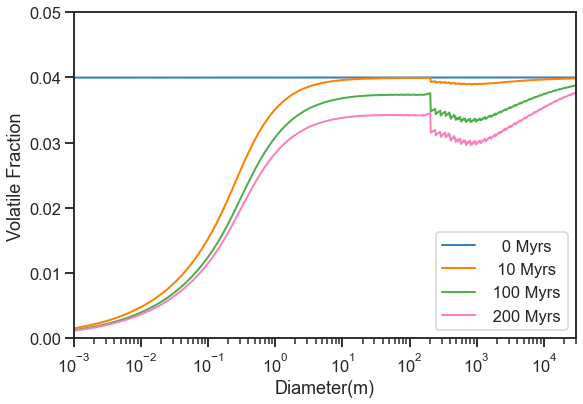

In [50]:


ll=0
fig, ax = plt.subplots(figsize=(9, 6))


for it in range(0,np.size(itime_max_float_arr)):
        
        
        itime_max_float= itime_max_float_arr[it]
        mass_all_1=get_mass(itime_max_float, dir1[j]+ "collouts.dat", 0)

        
################################################################################################

        time=float(timestep_plot_yr[ll])
        mass_s=np.zeros(nbin)

        for i in range(0,nbin-1): 
            mass_s[i]=float(mass_all_1[i])

        ###print, ll
        
################################################################################################

        mass_all_v=get_mass(itime_max_float, dir1[j]+ "colloutv.dat", 1)

        
        mass_v=np.zeros(nbin)

        for i in range(0,nbin-1): 
            mass_v[i]=float(mass_all_v[i])

        ###print, ll
        plt.plot(diam_i, mass_v/(mass_s+mass_v),  color=color_all[it],  label='{:4.0f}'.format(timestep_plot_yr[ll]/1e6) +' Myrs')  ###,label=str(round(time/(1e6*tyear),4))+'Myr')
        ll=ll+1
################################################################################################


ax.legend()

ax.set_xscale('log')
plt.xlabel('Diameter(m)')
plt.ylabel('Volatile Fraction')
ax.set_ylim((0,0.05))
ax.set_xlim((1e-3,dmax))
plt.savefig(dir1[j]+"fv.pdf")
    

<ipython-input-48-cc6387cdfbcc>:28: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(diam_i, 1./(1e6*tyear*rate_c),  color=color_all[it],  linestyle='dashed')  ###,label=str(round(time/(1e6*tyear),4))+'Myr')
<ipython-input-48-cc6387cdfbcc>:48: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(diam_i, 1./(1e6*tyear*rater),  color=color_all[it],  label='{:4.0f}'.format(timestep_plot_yr[ll]/1e6) +' Myrs', linestyle=":")  ###,label=str(round(time/(1e6*tyear),4))+'Myr')
<ipython-input-48-cc6387cdfbcc>:66: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(diam_i, 1./(1e6*tyear*ratec),  color=color_all[it], linestyle='dotted')#####,  label='{:4.2f}'.format(timestep_plot_yr[ll]/1e6) +' Myrs')  ###,label=str(round(time/(1e6*tyear),4))+'Myr')


/Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/delta_0.05/mtot_100_dmax_30km_fv_0.04/inparam.in


<ipython-input-48-cc6387cdfbcc>:28: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(diam_i, 1./(1e6*tyear*rate_c),  color=color_all[it],  linestyle='dashed')  ###,label=str(round(time/(1e6*tyear),4))+'Myr')
<ipython-input-48-cc6387cdfbcc>:48: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(diam_i, 1./(1e6*tyear*rater),  color=color_all[it],  label='{:4.0f}'.format(timestep_plot_yr[ll]/1e6) +' Myrs', linestyle=":")  ###,label=str(round(time/(1e6*tyear),4))+'Myr')
<ipython-input-48-cc6387cdfbcc>:66: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(diam_i, 1./(1e6*tyear*ratec),  color=color_all[it], linestyle='dotted')#####,  label='{:4.2f}'.format(timestep_plot_yr[ll]/1e6) +' Myrs')  ###,label=str(round(time/(1e6*tyear),4))+'Myr')


/Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/delta_0.05/mtot_100_dmax_30km_fv_0.04/inparam.in


<ipython-input-48-cc6387cdfbcc>:28: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(diam_i, 1./(1e6*tyear*rate_c),  color=color_all[it],  linestyle='dashed')  ###,label=str(round(time/(1e6*tyear),4))+'Myr')
<ipython-input-48-cc6387cdfbcc>:48: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(diam_i, 1./(1e6*tyear*rater),  color=color_all[it],  label='{:4.0f}'.format(timestep_plot_yr[ll]/1e6) +' Myrs', linestyle=":")  ###,label=str(round(time/(1e6*tyear),4))+'Myr')
<ipython-input-48-cc6387cdfbcc>:66: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(diam_i, 1./(1e6*tyear*ratec),  color=color_all[it], linestyle='dotted')#####,  label='{:4.2f}'.format(timestep_plot_yr[ll]/1e6) +' Myrs')  ###,label=str(round(time/(1e6*tyear),4))+'Myr')


/Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/delta_0.05/mtot_100_dmax_30km_fv_0.04/inparam.in


<ipython-input-48-cc6387cdfbcc>:28: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(diam_i, 1./(1e6*tyear*rate_c),  color=color_all[it],  linestyle='dashed')  ###,label=str(round(time/(1e6*tyear),4))+'Myr')
<ipython-input-48-cc6387cdfbcc>:48: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(diam_i, 1./(1e6*tyear*rater),  color=color_all[it],  label='{:4.0f}'.format(timestep_plot_yr[ll]/1e6) +' Myrs', linestyle=":")  ###,label=str(round(time/(1e6*tyear),4))+'Myr')
<ipython-input-48-cc6387cdfbcc>:66: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(diam_i, 1./(1e6*tyear*ratec),  color=color_all[it], linestyle='dotted')#####,  label='{:4.2f}'.format(timestep_plot_yr[ll]/1e6) +' Myrs')  ###,label=str(round(time/(1e6*tyear),4))+'Myr')


/Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/delta_0.05/mtot_100_dmax_30km_fv_0.04/inparam.in


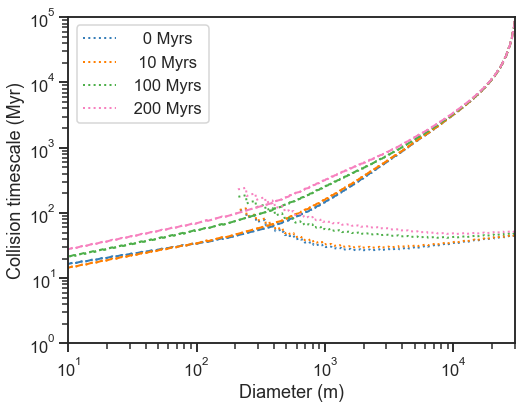

In [48]:
ll=0 
fig, ax = plt.subplots(figsize=(8, 6))
for it in range(0,np.size(itime_max_float_arr)):
  
    ####print('entering new loop it', it)
    itime_max_float= itime_max_float_arr[it]
    ####print('itime', itime_max_float)
    ratec_1=get_rate(itime_max_float, dir1[j]+ "ratec.dat")
    
################################################################################################
    time=float(timestep_plot_yr[ll])
    
    rate_c=np.zeros(nbin)

    for i in range(0,nbin-1): 
        
        rate_c[i]=float(ratec_1[i])
        
    mass_all_1=get_mass(itime_max_float, dir1[j]+ "collouts.dat", 0)
   
    mass_s=np.zeros(nbin)

    for i in range(0,nbin-1): 
        
        mass_s[i]=float(mass_all_1[i])
      
        
    plt.plot(diam_i, 1./(1e6*tyear*rate_c),  color=color_all[it],  linestyle='dashed')  ###,label=str(round(time/(1e6*tyear),4))+'Myr')
################################################################################################
     
    if vol==1:
        mass_all_v=get_mass(itime_max_float, dir1[j]+ "colloutv.dat",1) 

        mass_s=np.zeros(nbin)

        for i in range(0,nbin-1): 
            mass_s[i]=float(mass_all_v[i])
        
        rater_all=get_rate(itime_max_float, dir1[j]+ "rater.dat") 

        rater=np.zeros(nbin)

        for i in range(0,nbin-1): 
            rater[i]=float(rater_all[i])
        
        
        
        plt.plot(diam_i, 1./(1e6*tyear*rater),  color=color_all[it],  label='{:4.0f}'.format(timestep_plot_yr[ll]/1e6) +' Myrs', linestyle=":")  ###,label=str(round(time/(1e6*tyear),4))+'Myr')

################################################################################################

        mass_s=np.zeros(nbin)

        for i in range(0,nbin-1): 
            mass_s[i]=float(mass_all_v[i])
        
    ratec_all=get_rate(itime_max_float, dir1[j]+ "ratec.dat") 

    ratec=np.zeros(nbin)

    for i in range(0,nbin-1): 
        ratec[i]=float(ratec_all[i])
        
        
        
    plt.plot(diam_i, 1./(1e6*tyear*ratec),  color=color_all[it], linestyle='dotted')#####,  label='{:4.2f}'.format(timestep_plot_yr[ll]/1e6) +' Myrs')  ###,label=str(round(time/(1e6*tyear),4))+'Myr')
    ll=ll+1
################################################################################################

    file= dir1[j]+ "inparam.in"
    print(file)
    delta_t, outputinterval, dmax, dbl, delta, diam_i, nbin, vrel, rho_s, mtot0, rbelt, alpha, ecc,fv0=get_inparam(file)


####
ax.legend(loc='upper left') 
ax.set_yscale('log') 
ax.set_xscale('log') 
plt.xlabel('Diameter (m)') 
plt.ylabel('Collision timescale (Myr)') 
ax.set_ylim((1,1e5)) 
ax.set_xlim((10,dmax)) 
plt.savefig(dir1[j]+"rate_d.pdf")

In [49]:
a=0.3
Qa=620
Qb=5.6e-3
b=1.5
dw=((a*Qa)/(b*Qb))**(1./(a+b))
print(dw)

259.4291059464408
